### Loading the Dataset 

In [1]:
from tensorflow.keras.datasets import imdb

# Load IMDb dataset 
(X_train, y_train), (X_test, y_test)= imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

e:\Sentiment Classifier\senti\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
e:\Sentiment Classifier\senti\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


Training samples: 25000
Testing samples: 25000


### Inspecting the First Review

In [2]:
print(X_train[0])
print("Length of first review: ", len(X_train[0]))
print("Label: ", y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Length of first review:  218
Label:  1


Each IMDb review is stored as a sequence of integers, not as plain text. Each number represents a **word ID** from a fixed vocabulary. More frequent words get smaller IDs, and rare words get larger IDs. 

The label indicates the following:
- 1 -> Positive
- 2 -> Negative

Also the first review as 218 sequence of tokens. These tokens also include special values such as:
- `<START>` -> start of the review
- `<UNK>` -> unknown words

### Decoding Word IDs back to Real Text

In [3]:
word_index= imdb.get_word_index()
reverse_word_index= {value: key for (key, value) in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i-3, "?") for i in encoded_review])

print(decode_review(X_train[0]))
print("Label:", y_train[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi


Using the word index provided by Keras, the numeric sequence is converted back into readable text. Some words appear as `?` because: 
- They correspond to special tokens like `<START>` or `<UNK>`
- Or they are words not present in the limited vocabulary


### Checking Review Lengths

In [4]:
import numpy as np

review_lengths= [len(review) for review in X_train]

print("Minimum length: ", min(review_lengths))
print("Maximum length: ", max(review_lengths))
print("Average length: ", int(np.mean(review_lengths)))


Minimum length:  11
Maximum length:  2494
Average length:  238


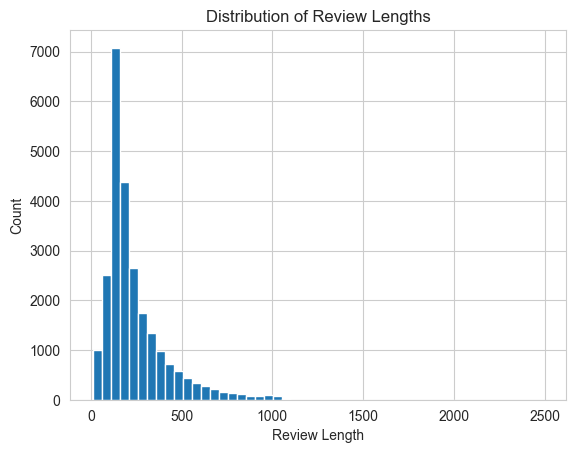

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.hist(review_lengths, bins=50)
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()

Most reviews fall between **100 and 400 tokens**, with a peak around **200-250 tokens**. A small number of reviews are much longer, forming a long tail. This means that very long reviews are rare. Since neural networks require fixed-size inputs, we will choose a maximum length that covers most reviews avoiding unnecessary padding.

### Padding and Truncation

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len= 300

X_train_padded= pad_sequences(
    X_train,
    maxlen=max_len,
    padding='post',
    truncating='post'
)

X_test_padded= pad_sequences(
    X_test,
    maxlen=max_len,
    padding='post',
    truncating='post'
)

print(X_train_padded.shape)
print(X_test_padded.shape)

(25000, 300)
(25000, 300)


In [7]:
print(X_train_padded[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

All reviews are converted to the same length using padding. A maximum length of **300 tokens** is choosen. Reviews shorter than this are padded with `0's, and longer reviews are truncated. 

### Baseline Model

In [8]:
# Converting reviewd back to text
decoded_train= [decode_review(review) for review in X_train]
decoded_test= [decode_review(review) for review in X_test]

In [9]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(max_features=10000)

X_train_tfidf= tfidf.fit_transform(decoded_train)
X_test_tfidf= tfidf.transform(decoded_test)

In [10]:
# Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [11]:
# Evaluating the Baseline Model
from sklearn.metrics import accuracy_score, classification_report

y_pred= lr.predict(X_test_tfidf)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("-"*50)
print(classification_report(y_test, y_pred))

Accuracy:  0.88416
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



The baseline model is trained using TF-IDF features and Logistic Regression. The model gives an Accuracy of `0.88416`. According to the classification report, the baseline model performs well and predicts both positive and negative reviews with similar accuracy. 

### Loading GloVe into Python

In [12]:
embedding_dim= 100
embeddings_index= {}

with open("../data/glove.6B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values= line.split()
        word= values[0]
        vector= np.asarray(values[1:], dtype="float32")
        embeddings_index[word]= vector

print("Number of Word Vectors: ", len(embeddings_index))

Number of Word Vectors:  400000


### Building the Embedding Matrix

In [13]:
vocab_size= 10004
embedding_matrix= np.zeros((vocab_size, embedding_dim))

for word, index in word_index.items():
    if index+3<vocab_size:
        vector= embeddings_index.get(word)
        if vector is not None:
            embedding_matrix[index+3]= vector

To incorporate semantic meaning into the model, we used **pre-trained GloVe word embeddings**. The file contains 100-dimensional vector representation for 4,00,000 English words. So we have mapped the each word to its corresponding embedding vector using a dictionary.

After that an embedding matrix is created to align the IMDb vocabulary with the pre-trained GloVe model. The matrix has a shape of `(10000,100)`, where each row corresponds to a word index from the IMDb dataset and each row stores the 100-dimensional GloVe vector for that word. So basically we are considering top **10,000** words for the model vocabulary 

### Building the Deep Learning Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model= Sequential([
    Embedding(
        input_dim= vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False,
        mask_zero=True
    ),
    LSTM(128, dropout=0.2),
    Dense(1, activation='sigmoid')
])


model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

e:\Sentiment Classifier\senti\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Train and Evaluate

In [15]:
history= model.fit(
    X_train_padded,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 503ms/step - accuracy: 0.6559 - loss: 0.6175 - val_accuracy: 0.7380 - val_loss: 0.5350
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 500ms/step - accuracy: 0.7500 - loss: 0.5192 - val_accuracy: 0.7920 - val_loss: 0.4554
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 166s 530ms/step - accuracy: 0.7973 - loss: 0.4413 - val_accuracy: 0.8350 - val_loss: 0.3765
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 162s 517ms/step - accuracy: 0.8275 - loss: 0.3890 - val_accuracy: 0.8418 - val_loss: 0.3504
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 162s 517ms/step - accuracy: 0.8386 - loss: 0.3637 - val_accuracy: 0.8524 - val_loss: 0.3376


In [16]:
model.evaluate(X_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.8525 - loss: 0.3403


[0.34028366208076477, 0.8524799942970276]

A deep learning model is built using an **LSTM-based architecture**. The model consists of:
- An **Embedding Layer** initialized with the pre-trained GloVe embedding matrix.
- An **LSTM Layer** with 128 units to capture sequential and contextual information from the revenue.
- A **Dense output layer** with sigmoid activation for binary sentiment classification.

The embedding layer is kept **non-trainable** so that the semantic information learned from GloVe is preserved during trainig. Padding tokens were ignored using masking to prevent them from affecting learning.

The model is compiled using:
- **Binary cross-entropy** loss, suitable for binary classification tasks  
- **Adam optimizer**, which provides efficient and stable training  
- **Accuracy** as the evaluation metric  

This setup allows the model to learn sentiment polarity effectively while monitoring overall classification performance.

During training, both training and validation accuracy improved consistently, indicating that the model was learning meaningful patterns from the data without severe overfitting.

After training, the model was evaluated on the unseen test set. The final test accuracy achieved is approximately `85.2%`. This confirms that the LSTM model is able to generalize well to new reviews and correctly classify sentiment for the majority of the cases. 

From the results, we observe that:
- The LSTM model succesfully learns sentiment-related pattern by considering **word order and context**
- Pre-trained GloVe embeddings provide a strong semantic foundation for the model
- The model performs competitively, though it slightly underperforms compared to the TF-IDF + Logigistic Regression Baseline

So this highlights that:
- Classical models with TF-IDF can ve a very strong for sentiment analysis
- Deep learning models require careful tuning to outperform such baselines

So in order to further improve the performance and attempt to surpass the baseline model, I will explore the following:
- Training more epochs with **EarlyStopping**
- Allowing the embedding layer to be **trainable**
- Experimenting the **Bidirectional LSTM** architectures
- Comparing improvements systematically with the baseline model

### Adding EarlyStopping and More Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping= EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

history= model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 492ms/step - accuracy: 0.8493 - loss: 0.3454 - val_accuracy: 0.8544 - val_loss: 0.3312
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 155s 496ms/step - accuracy: 0.8568 - loss: 0.3326 - val_accuracy: 0.8546 - val_loss: 0.3307
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 170s 543ms/step - accuracy: 0.8620 - loss: 0.3220 - val_accuracy: 0.8652 - val_loss: 0.3222
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 295ms/step - accuracy: 0.8702 - loss: 0.3046 - val_accuracy: 0.8690 - val_loss: 0.3106
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.8784 - loss: 0.2879 - val_accuracy: 0.8606 - val_loss: 0.3276
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.8795 - loss: 0.2838 - val_accuracy: 0.8702 - val_loss: 0.3147


In [18]:
model.evaluate(X_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8679 - loss: 0.3086


[0.30860936641693115, 0.8678799867630005]

Now to imporve the performance **EarlyStopping** is introduced during the training. Instead of manually choosing the epochs, this allows the model to stop training automatically when validation performance stops improving. 

The model is trained with: 
- A maximum of **10 epochs**
- **EarlyStopping** monitored on validation loss
- Best model weights restored automatically

During training, both training and validation accuracy increased steadily:
- Training accuracy improved from ~0.85 to ~0.88
- Validation accuracy improved from ~0.85 to ~0.8
- Validation loss gradually decreased and then plateaued

This indicates healthy learning behaviour, where the model learns meaningful patterns without severe overfitting.

After training with EarlyStopping, the model was evaluated on the unseen test set. Final test accuracy achieved is `86.8%`. This shows a clear improvement over the earlier LSTM model trained without EarlyStopping.

From this, we observe that:
- EarlyStopping helps find an optimal training point without manual tuning
- Increasing epochs improves performance up to a limit, after which gains diminish
- The LSTM model with GloVe embeddings becomes competitive with the TF-IDF baseline

However, the classical TF-IDF + Logistic Regression model still performs slightly better, highlighting how strong traditional methods can be for sentiment analysis.

To give the deep learning model a stronger advantage, the next step will be to experiment with a **Bidirectional LSTM**, which can capture both past and future context in a review. This is expected to further improve sentiment classification performance.

### Bidirectional LSTM

In [19]:
from tensorflow.keras.layers import Bidirectional

model= Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False,
        mask_zero=True
    ),
    Bidirectional(LSTM(128, dropout=0.2)),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [20]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 309ms/step - accuracy: 0.6763 - loss: 0.5949 - val_accuracy: 0.7858 - val_loss: 0.4770
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 343ms/step - accuracy: 0.7834 - loss: 0.4607 - val_accuracy: 0.8086 - val_loss: 0.4259


In [21]:
model.evaluate(X_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.7794 - loss: 0.4732


[0.4731901288032532, 0.7793999910354614]

To further improve the deep learning model, a **Bidirectional LSTM** is introduced. Unlike standard LSTM that process text only from left to right, a Bidirectional LSTM reads the sequence in **both forward and backward directions**, allowing it to capture context from both past and future words. It is very useful here because the meaning of a sentence can depend on words that appear later in the review.

The Bidirectional LSTM is trained using the same setup as the previous model. During training, training and validation accuracy improved in the initial epochs. However, training is stopped very early. Final test performance achieved is approximately `77.9%`. This is lower than the performance of the single-directional LSTM model.

So from this, we observe that:
- Bidirectional LSTM models have **higher capacity** and learn more slowly
- EarlyStopping with low patience caused training to stop **before the model fully converged**
- Using the same hyperparameters as a simpler model is not always optimal for a more complex architecture

So now to allow the Bidirectional LSTM sufficient time to learn, I will:
- Increase the EarlyStopping patience
- Train for more epochs while still preventing overfitting

This will help determine whether the Bidirectional LSTM can outperform the single-direction LSTM and the TF-IDF baseline.

### Parameter Adjustment

In [22]:
early_stopping= EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train_padded,
    y_train,
    epochs=12,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 650ms/step - accuracy: 0.7770 - loss: 0.4728 - val_accuracy: 0.8244 - val_loss: 0.4036
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 359ms/step - accuracy: 0.8145 - loss: 0.4053 - val_accuracy: 0.8272 - val_loss: 0.3903
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 351ms/step - accuracy: 0.8321 - loss: 0.3766 - val_accuracy: 0.8510 - val_loss: 0.3496
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8493 - loss: 0.3491 - val_accuracy: 0.8586 - val_loss: 0.3328
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 178s 568ms/step - accuracy: 0.8574 - loss: 0.3285 - val_accuracy: 0.8356 - val_loss: 0.3619
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 347ms/step - accuracy: 0.8660 - loss: 0.3070 - val_accuracy: 0.8704 - val_loss: 0.3185
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 340ms/step - accuracy: 0.8767 - loss: 0.2906 - val_accuracy: 0.8686 - val_loss: 0.3098
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.8838 - lo

In [23]:
model.evaluate(X_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8754 - loss: 0.2997


[0.2996891736984253, 0.8754000067710876]

During training:
- Training accuracy increased steadily from ~0.78 to ~0.91
- Validation accuracy improved gradually and peaked around **~0.88**
- Beyond this point, validation performance plateaued while training accuracy continued to rise

This indicates the onset of overfitting beyond a certain number of epochs. Final test performance achieved is around `87.5%`. 

From these results, we observe that:
- The Bidirectional LSTM did not provide a significant improvement over the single-direction LSTM
- Increased architectural complexity did not lead to better generalization on the IMDb dataset
- The single LSTM model already captured sufficient contextual information for sentiment prediction

This highlights that more complex architectures do not always guarantee better performance, especially when strong baselines already exist.

Based on these findings, the Bidirectional LSTM will not be pursued further in this project. The next step will be to improve performance by allowing the **embedding layer to be trainable**, enabling the word vectors to adapt specifically to the sentiment analysis task.

### Making Embeddings Trainable

In [24]:
model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True,
        mask_zero=True
    ),
    LSTM(128, dropout=0.2),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [25]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 236ms/step - accuracy: 0.6906 - loss: 0.5819 - val_accuracy: 0.8236 - val_loss: 0.4011
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - accuracy: 0.8440 - loss: 0.3636 - val_accuracy: 0.8434 - val_loss: 0.3771
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 213ms/step - accuracy: 0.8974 - loss: 0.2587 - val_accuracy: 0.8734 - val_loss: 0.3111
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 226ms/step - accuracy: 0.9183 - loss: 0.2119 - val_accuracy: 0.8914 - val_loss: 0.2745
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 457ms/step - accuracy: 0.9414 - loss: 0.1620 - val_accuracy: 0.8922 - val_loss: 0.2981
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 155s 494ms/step - accuracy: 0.9546 - loss: 0.1290 - val_accuracy: 0.8940 - val_loss: 0.2993


In [26]:
model.evaluate(X_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8842 - loss: 0.2822


[0.2822020649909973, 0.8841599822044373]

During training:
- Training accuracy increased rapidly, eventually exceeding **95%**
- Validation accuracy improved consistently and peaked around **~89%**
- After this point, training accuracy continued to rise while validation accuracy stabilized

This behavior indicates that the model was able to learn task-specific word representations while maintaining reasonable generalization. Final test performance achieved is around `88.4%`. This represents the best performance achieved by the deep learning models in this project. 

From this, we observed that:
- Allowing embeddings to be trainable provided the **largest performance improvement** among all deep learning modifications
- Learning task-specific word meanings was more beneficial than increasing architectural complexity
- The model was able to adapt general GloVe embeddings to better capture sentiment-related nuances in movie reviews

This demonstrates the importance of representation learning in natural language processing tasks. Allowing the embedding layer to be trainable enabled the model to learn task-specific word representations, resulting in a deep learning model whose performance is **comparable to the strong TF-IDF + Logistic Regression baseline**. Although the deep learning model does not significantly outperform the baseline, it achieves similar performance while learning richer contextual representations. Considering this balance between expressive power and performance, the LSTM model with trainable GloVe embeddings is selected as the **final deep learning model** for this project.

### Training & Validation Accuracy / Loss Plots (Final LSTM)

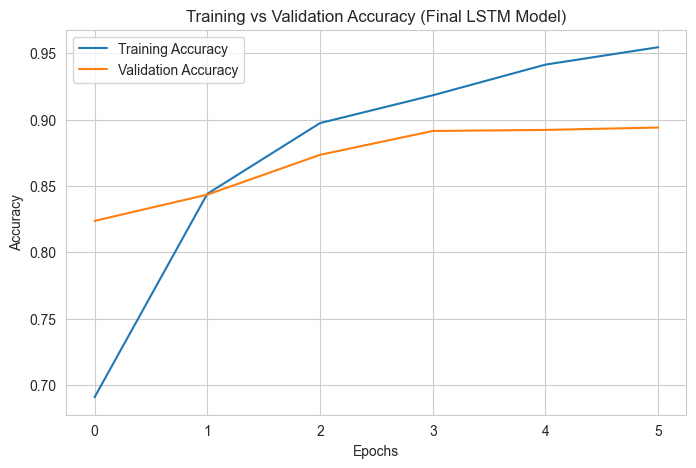

In [33]:
# Accuracy Plots
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Final LSTM Model)")
plt.legend()
plt.grid(True)
plt.show()

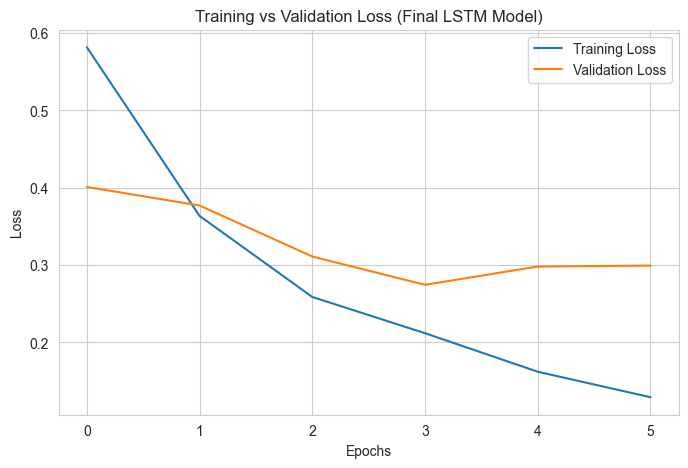

In [34]:
# Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Final LSTM Model)")
plt.legend()
plt.grid(True)
plt.show()

The training and validation accuracy curves show that the model learns rapidly during the initial epochs. Training accuracy increases steadily and continues to improve, while validation accuracy rises quickly and then begins to plateau. This behavior indicates that the model converges early and starts to **overfit** after a certain point, as further improvements in training accuracy do not translate into significant gains on the validation set.

The loss curves further support this observation. Training loss decreases consistently across epochs, whereas validation loss decreases initially and then stabilizes, with a slight upward trend in later epochs. These trends justify the use of **EarlyStopping**, which helps select the optimal training point and prevents unnecessary overtraining. Overall, the curves indicate stable learning and good generalization for the final LSTM model.

### Final Evaluation and Model Comparison

Baseline Model Accuracy: 
0.88416
--------------------------------------------------
Baseline Model Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



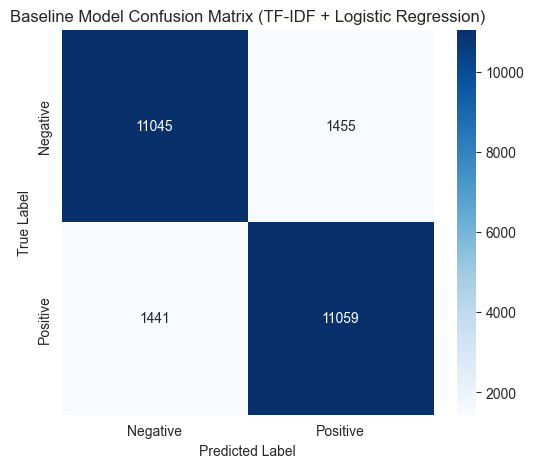

In [31]:
# For Baseline Model
from sklearn.metrics import confusion_matrix

y_baseline_pred= lr.predict(X_test_tfidf)

print("Baseline Model Accuracy: ")
print(accuracy_score(y_test, y_baseline_pred))
print("-"*50)

print("Baseline Model Classification Report: ")
print(classification_report(y_test, y_baseline_pred))

cm = confusion_matrix(y_test, y_baseline_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Baseline Model Confusion Matrix (TF-IDF + Logistic Regression)")
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step
Final LSTM Model Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12500
           1       0.87      0.90      0.89     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



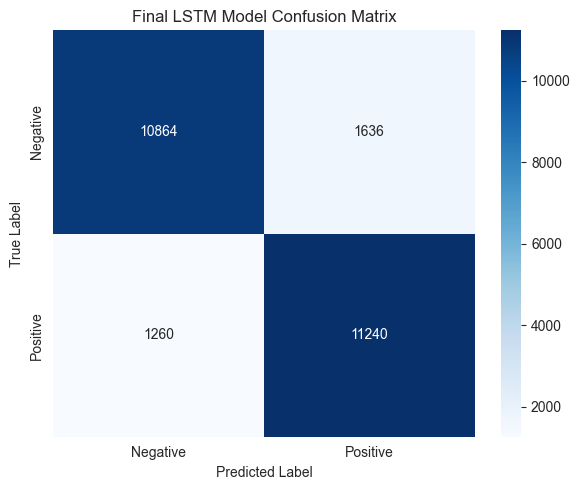

In [32]:
# Final LSTM Model Evaluation
y_pred_probs= model.predict(X_test_padded)
y_pred_final= (y_pred_probs>=0.5).astype(int).ravel()

print("Final LSTM Model Classification Report: ")
print(classification_report(y_test, y_pred_final))

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Final LSTM Model Confusion Matrix")
plt.tight_layout()
plt.show()

To perform a fair comparison, both the baseline model and the final deep learning model were evaluated on the same test set using **accuracy, precision, recall, F1-score**, and **confusion matrices**.

| Model | Accuracy | Precision | Recall | F1-score |
|------|----------|-----------|--------|----------|
| TF-IDF + Logistic Regression | 0.884 | 0.88 | 0.88 | 0.88 |
| LSTM + Trainable GloVe Embeddings | 0.884 | 0.88 | 0.88 | 0.88 |


---



### Baseline Model Performance *(TF-IDF + Logistic Regression)*

- **Accuracy:** `0.884`
- Precision, recall, and F1-score are balanced across both classes

The confusion matrix shows:
- Correctly classified **11,045 negative** reviews
- Correctly classified **11,059 positive** reviews
- A similar number of false positives and false negatives

This confirms that the baseline model performs consistently well and does not exhibit class bias.

---

### Final Deep Learning Model Performance *(LSTM with Trainable GloVe Embeddings)*

- **Accuracy:** `0.884`
- **Negative class:**  
  - Precision: `0.90`, Recall: `0.87`
- **Positive class:**  
  - Precision: `0.87`, Recall: `0.90`

From the confusion matrix:
- The model correctly identifies **11,240 positive** reviews
- Slightly fewer negative reviews are misclassified compared to the baseline
- The model shows a small trade-off between precision and recall across classes

---

### Key Observations

From the final evaluation, we observe that:
- Both models achieve **very similar overall accuracy**
- The baseline model is slightly more balanced in error distribution
- The LSTM model demonstrates stronger **contextual understanding**, reflected in improved recall for positive reviews
- Differences in performance are marginal and within expected variance

---

### Conclusion

### Conclusion

The final LSTM model with trainable GloVe embeddings achieves performance **comparable to the strong TF-IDF + Logistic Regression baseline**. While it does not significantly outperform the baseline in terms of accuracy, it successfully matches its performance while learning richer contextual and semantic representations.

Through systematic experimentation, it was observed that improvements such as EarlyStopping, Bidirectional LSTMs, and increased model complexity did not consistently lead to better generalization. The most impactful improvement came from allowing the embedding layer to be trainable, enabling the model to adapt word representations specifically for sentiment analysis.

This highlights an important insight: **strong classical models can remain highly competitive for text classification tasks, and deep learning models require careful tuning and architectural choices to justify their added complexity.**
